<a href="https://colab.research.google.com/github/Nivedita74/Computer-Vision/blob/main/Moving_Object_Detection_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name : Moving Object Detecion**

##### **Project Type**    - Computer vision
##### **Contribution**    - Individual
##### **Team Member 1 -**   Nivedita

#**Github Link**

Provide your GitHub Link here. :

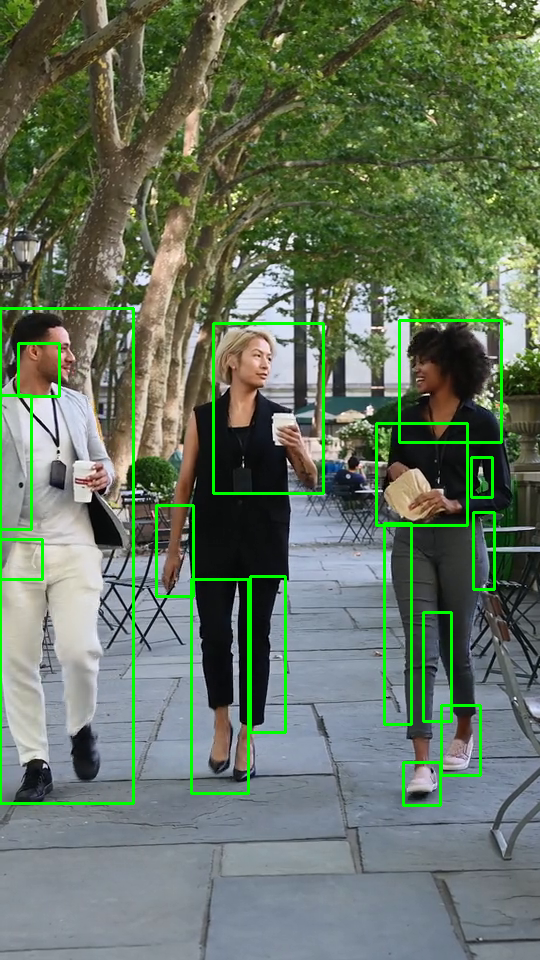

Processing complete.


In [ ]:
# STEP 1: Upload the video
from google.colab import files
uploaded = files.upload()

# STEP 2: Get the filename
video_path = next(iter(uploaded))
print("Video uploaded:", video_path)

# STEP 3: Install OpenCV
!pip install opencv-python-headless

# STEP 4: Motion detection using frame differencing
import cv2
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Open the uploaded video file
cap = cv2.VideoCapture(video_path)

# Read two initial frames
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened() and ret:
    # Frame differencing
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around moving objects
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert to RGB for display in Colab
    rgb_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(rgb_frame)

    clear_output(wait=True)
    display(pil_img)

    # Prepare for next iteration
    frame1 = frame2.copy()
    ret, frame2 = cap.read()

cap.release()
print("Processing complete.")